In [21]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pubchempy as pcp

def obtener_smiles_por_formula(formula):
    formula = formula.strip()
    try:
        # Buscar por fórmula en PubChem
        compuestos = pcp.get_compounds(formula, namespace='formula')
        if compuestos:
            return compuestos[0].isomeric_smiles
        
        # Si no se encontró nada, intentar buscar por nombre directo (para casos como "water")
        compuestos = pcp.get_compounds(formula, namespace='name')
        if compuestos:
            return compuestos[0].isomeric_smiles
        
        raise ValueError(f"No se encontró ningún compuesto con fórmula o nombre: '{formula}'")
    except Exception as e:
        raise ValueError(f"No se pudo obtener SMILES para '{formula}': {e}")

def calcular_propiedades_quimicas(smiles, masa_compuesto=None, atomos_especificos=None):
    resultados = {}
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError("SMILES no válido")

        masa_molar = rdMolDescriptors.CalcExactMolWt(mol)
        resultados['masa_molar'] = masa_molar

        if masa_compuesto is not None:
            moles_compuesto = masa_compuesto / masa_molar
            resultados['moles_compuesto'] = moles_compuesto

            conteo_elementos = {}
            masas_atomicas = {}

            # Conteo de átomos en la molécula
            for atom in mol.GetAtoms():
                simbolo = atom.GetSymbol()
                conteo_elementos[simbolo] = conteo_elementos.get(simbolo, 0) + 1
                # Masa atómica por defecto (de RDKit)
                if not atomos_especificos or simbolo not in atomos_especificos:
                    masas_atomicas[simbolo] = atom.GetMass()

            # Actualizar con masas atómicas personalizadas si hay
            if atomos_especificos:
                masas_atomicas.update(atomos_especificos)

            # Cálculo de masa y moles por elemento
            for simbolo, cantidad in conteo_elementos.items():
                masa_atomica = masas_atomicas.get(simbolo)
                if masa_atomica is None:
                    raise ValueError(f"Masa atómica no encontrada para el elemento: {simbolo}")
                moles_atomo = moles_compuesto * cantidad
                masa_atomo = moles_atomo * masa_atomica
                resultados[f'moles_{simbolo}'] = moles_atomo
                resultados[f'masa_{simbolo}'] = masa_atomo

    except Exception as e:
        resultados['error'] = str(e)

    return resultados

def calculamasas(formula_, masa_):
    formula = formula_.strip()
    masa = masa_

    atomos = {}  # Puedes personalizar masas aquí si quieres, e.g. {'Na': 22.99}

    try:
        smiles = obtener_smiles_por_formula(formula)
        resultados = calcular_propiedades_quimicas(smiles, masa_compuesto=masa, atomos_especificos=atomos)

        if 'error' in resultados:
            print("Error:", resultados['error'])
        else:
            print(f"Fórmula: {formula}")
            print(f"SMILES: {smiles}")
            print(f"Masa molar: {resultados['masa_molar']:.4f} g/mol")
            print(f"Moles en {masa} g: {resultados['moles_compuesto']:.4f} mol")

            for clave in resultados:
                if clave.startswith("masa_") and clave != "masa_molar":
                    simbolo = clave.split("_")[1]
                    print(f"Masa de {simbolo}: {resultados[clave]:.2f} g")

    except ValueError as e:
        print("Error:", e)

# Pruebas
calculamasas("H2O", 45)
calculamasas("CaCl2", 15)
calculamasas("H3PO4", 20)





Fórmula: H2O
SMILES: O
Masa molar: 18.0106 g/mol
Moles en 45 g: 2.4985 mol
Masa de O: 39.97 g
Fórmula: CaCl2
SMILES: [Cl-].[Cl-].[Ca+2]
Masa molar: 109.9003 g/mol
Moles en 15 g: 0.1365 mol
Masa de Cl: 9.68 g
Masa de Ca: 5.47 g
Fórmula: H3PO4
SMILES: OP(=O)(O)O
Masa molar: 97.9769 g/mol
Moles en 20 g: 0.2041 mol
Masa de O: 13.06 g
Masa de P: 6.32 g



 INFORME QUÍMICO DEL COMPUESTO: H2SO4 

SMILES generado: OS(=O)(=O)O
Masa molar calculada: 97.9674 g/mol

Cantidad total de muestra: 45 gramos
Cantidad de sustancia (moles): 0.4593 mol

Distribución de masa y moles por elemento:
----------------------------------------
Elemento: O   | Masa:  29.3957 g | Moles:   1.8373 mol
Elemento: S   | Masa:  14.7295 g | Moles:   0.4593 mol
----------------------------------------




3Dmol.js failed to load for some reason. Please check your browser console for error messages.

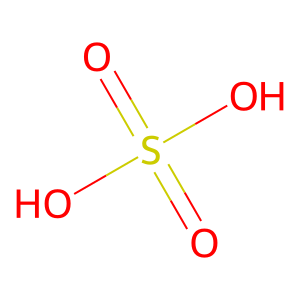


 INFORME QUÍMICO DEL COMPUESTO: HNO3 

SMILES generado: [N+](=O)(O)[O-]
Masa molar calculada: 62.9956 g/mol

Cantidad total de muestra: 15 gramos
Cantidad de sustancia (moles): 0.2381 mol

Distribución de masa y moles por elemento:
----------------------------------------
Elemento: N   | Masa:   3.3352 g | Moles:   0.2381 mol
Elemento: O   | Masa:  11.4286 g | Moles:   0.7143 mol
----------------------------------------




3Dmol.js failed to load for some reason. Please check your browser console for error messages.

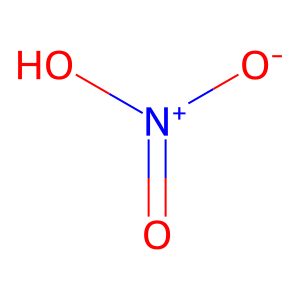


 INFORME QUÍMICO DEL COMPUESTO: H3PO4 

SMILES generado: OP(=O)(O)O
Masa molar calculada: 97.9769 g/mol

Cantidad total de muestra: 20 gramos
Cantidad de sustancia (moles): 0.2041 mol

Distribución de masa y moles por elemento:
----------------------------------------
Elemento: O   | Masa:  13.0635 g | Moles:   0.8165 mol
Elemento: P   | Masa:   6.3227 g | Moles:   0.2041 mol
----------------------------------------




3Dmol.js failed to load for some reason. Please check your browser console for error messages.

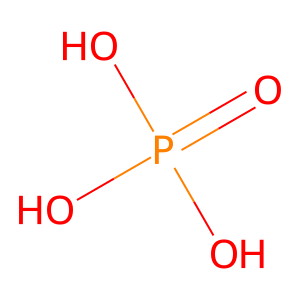

In [2]:
import pubchempy as pcp
import warnings
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdMolDescriptors
from IPython.display import display
import py3Dmol
warnings.filterwarnings('ignore')  
def obtener_smiles_por_formula(formula):
    compuestos = pcp.get_compounds(formula, 'formula')
    if not compuestos:
        raise ValueError(f"No se encontró compuesto con fórmula: {formula}")
    return compuestos[0].isomeric_smiles

def calcular_propiedades(smiles, masa_total=None, atomos_pesos=None):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("SMILES inválido")

    masa_molar = rdMolDescriptors.CalcExactMolWt(mol)
    resultados = {'masa_molar': masa_molar}

    if masa_total:
        moles = masa_total / masa_molar
        resultados['moles'] = moles
        conteo = {}
        for atom in mol.GetAtoms():
            s = atom.GetSymbol()
            conteo[s] = conteo.get(s, 0) + 1

        # Usar pesos personalizados si se dan, si no usar masa atómica RDKit
        masas = {}
        for s in conteo:
            masas[s] = atomos_pesos[s] if atomos_pesos and s in atomos_pesos else Chem.GetPeriodicTable().GetAtomicWeight(s)

        for s, c in conteo.items():
            moles_atomo = moles * c
            masa_atomo = moles_atomo * masas[s]
            resultados[f'moles_{s}'] = moles_atomo
            resultados[f'masa_{s}'] = masa_atomo

    return resultados

def visualizar_3d(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.UFFOptimizeMolecule(mol)
    mol_block = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=600, height=400)
    viewer.addModel(mol_block, 'mol')
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    return viewer

def dibujar_2d(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("SMILES inválido para dibujo 2D")
    return Draw.MolToImage(mol, size=(300,300))

# Función principal simple para juntar todo y mostrar texto tipo informe
def informe_compuesto(formula, masa_total=None, atomos_pesos=None):
    try:
        smiles = obtener_smiles_por_formula(formula)
        resultados = calcular_propiedades(smiles, masa_total, atomos_pesos)

        print(f"\n{'='*50}")
        print(f" INFORME QUÍMICO DEL COMPUESTO: {formula.upper()} ")
        print(f"{'='*50}\n")

        print(f"SMILES generado: {smiles}")
        print(f"Masa molar calculada: {resultados['masa_molar']:.4f} g/mol\n")

        if masa_total:
            print(f"Cantidad total de muestra: {masa_total} gramos")
            print(f"Cantidad de sustancia (moles): {resultados['moles']:.4f} mol\n")
            print("Distribución de masa y moles por elemento:")
            print(f"{'-'*40}")
            for k, v in resultados.items():
                if k.startswith('masa_') and k != 'masa_molar':
                    elem = k.split('_')[1]
                    masa_elem = resultados[f'masa_{elem}']
                    moles_elem = resultados[f'moles_{elem}']
                    print(f"Elemento: {elem:<3} | Masa: {masa_elem:>8.4f} g | Moles: {moles_elem:>8.4f} mol")
            print(f"{'-'*40}\n")

        print(f"{'='*50}\n")

        # Visualizar 3D
        viewer = visualizar_3d(smiles)
        viewer.show()

        # Mostrar imagen 2D
        img = dibujar_2d(smiles)
        display(img)

    except Exception as e:
        print("Error:", e)

# Ejemplo de uso
informe_compuesto("H2SO4", 45)
informe_compuesto("HNO3", 15)
informe_compuesto("H3PO4", 20)
